## Experiment 5: Michelson-Interferometer

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts) (I will then put everything in a collective notebook for the advisors)

In [2]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Measurement of the refraction index of air

procedure:
1. read in raw data
2. determine $\delta n$ from the ring count
3. determine $\delta p$ from the raw data
4. determine $\delta n$/ $\delta p$
5. use a linear relationship with the boundary condition that n(0) = 1 $\Longrightarrow$ n(p) = 1 + $\delta p$/$\delta p$ $\cdot$ p to determine n for air

In [4]:
data = pd.read_csv("Refraction_air.csv", sep=",")
data["error pressure (mbar)"] = 20
data

,Measurement,Ringcount,pressure (mbar),error pressure (mbar)
0,1,5,-160,20
1,2,4,-300,20
2,3,4,-420,20
3,4,2,-500,20
4,5,2,-570,20
5,6,2,-620,20
6,7,1,-660,20
7,8,2,-720,20
8,9,1,-750,20
9,10,1,-780,20


$m = \Delta S = \dfrac{2\cdot l}{\lambda_0} \delta n \Longrightarrow \delta n = \dfrac{m \cdot \lambda_0}{2\cdot l}$

In [5]:
lambda_0 = 632.8e-9 #m
lambda_0

6.328e-07

In [6]:
#WARNING: this is not our value but some random
l=ufloat(38.0e-3,0.2e-3) #meter

#### instead of looking at ringcounts and pressure differences between each measurements ==> additive approach ==> greater area

In [7]:
ringcounts = np.array([5,9,13,15,17,19,20,22,23,24])
delta_n = ringcounts*lambda_0/(l*2)
delta_n

array([4.163157894736842e-05+/-2.1911357340720222e-07,
       7.493684210526315e-05+/-3.94404432132964e-07,
       0.00010824210526315789+/-5.696952908587258e-07,
       0.00012489473684210528+/-6.573407202216067e-07,
       0.00014154736842105265+/-7.449861495844876e-07,
       0.0001582+/-8.326315789473685e-07,
       0.00016652631578947368+/-8.764542936288089e-07,
       0.00018317894736842106+/-9.6409972299169e-07,
       0.00019150526315789474+/-1.0079224376731302e-06,
       0.0001998315789473684+/-1.0517451523545707e-06], dtype=object)

In [8]:
delta_p = delta_n
for i in range(len(data[" pressure (mbar)"])):
    delta_p[i] = ufloat(abs(data[" pressure (mbar)"][i]), 20)

In [9]:
delta_n = ringcounts*lambda_0/(l*2)
delta_n

array([4.163157894736842e-05+/-2.1911357340720222e-07,
       7.493684210526315e-05+/-3.94404432132964e-07,
       0.00010824210526315789+/-5.696952908587258e-07,
       0.00012489473684210528+/-6.573407202216067e-07,
       0.00014154736842105265+/-7.449861495844876e-07,
       0.0001582+/-8.326315789473685e-07,
       0.00016652631578947368+/-8.764542936288089e-07,
       0.00018317894736842106+/-9.6409972299169e-07,
       0.00019150526315789474+/-1.0079224376731302e-06,
       0.0001998315789473684+/-1.0517451523545707e-06], dtype=object)

In [10]:
delta_p

array([160.0+/-20.0, 300.0+/-20.0, 420.0+/-20.0, 500.0+/-20.0,
       570.0+/-20.0, 620.0+/-20.0, 660.0+/-20.0, 720.0+/-20.0,
       750.0+/-20.0, 780.0+/-20.0], dtype=object)

#### I am not sure if this is what we needed to do - but this would be one alternative

In [11]:
# first estimation
slope = delta_n/delta_p
slope

array([2.601973684210526e-07+/-3.2553489019124635e-08,
       2.497894736842105e-07+/-1.670444628815936e-08,
       2.5771929824561404e-07+/-1.2347079901115536e-08,
       2.4978947368421057e-07+/-1.0077699993120537e-08,
       2.483287165281625e-07+/-8.810767522057281e-09,
       2.551612903225806e-07+/-8.33984658405118e-09,
       2.5231259968102076e-07+/-7.760302449295501e-09,
       2.544152046783626e-07+/-7.19282570062554e-09,
       2.55340350877193e-07+/-6.940430413140436e-09,
       2.5619433198380564e-07+/-6.706045208872832e-09], dtype=object)

compute weighted average with error:

In [12]:
total_weight = 0
for i in range(len(slope)):
    total_weight += (1/slope[i].s)**2
total_weight

1.2712276588921592e+17

In [13]:
weighted_error = np.sqrt(1/total_weight)
weighted_error

2.8047123913707487e-09

In [14]:
weighted_sum = 0
for i in range(len(slope)):
    weighted_sum += ((1/slope[i].s)**2) * slope[i].n
weighted_sum

32263146099.116795

In [15]:
weighted_sum/total_weight

2.5379518667201796e-07

In [16]:
weighted_average_slop = ufloat(2.5379518667201796e-07, 2.8047123913707487e-09) # unit: mbar^{-1}

$n(p) = 1 + \dfrac{\delta n}{\delta p} \cdot p$

In [17]:
def n(p, slope):
    return 1 + slope*p

In [18]:
n(1013.25, weighted_average_slop)

1.0002571579728954+/-2.841874830556411e-06

In [19]:
y = np.zeros(len(delta_p))
yerr = np.zeros(len(delta_p))
for i in range(len(delta_p)):
    y[i] = (n(1013.25-delta_p[i].n, weighted_average_slop)).n
    yerr[i] = (n(1013.25-delta_p[i].n, weighted_average_slop)).s

In [20]:
x = np.zeros(len(delta_p))
xerr = np.zeros(len(delta_p))
for i in range(len(delta_p)):
    x[i] = -delta_p[i].n
    xerr[i] = delta_p[i].s

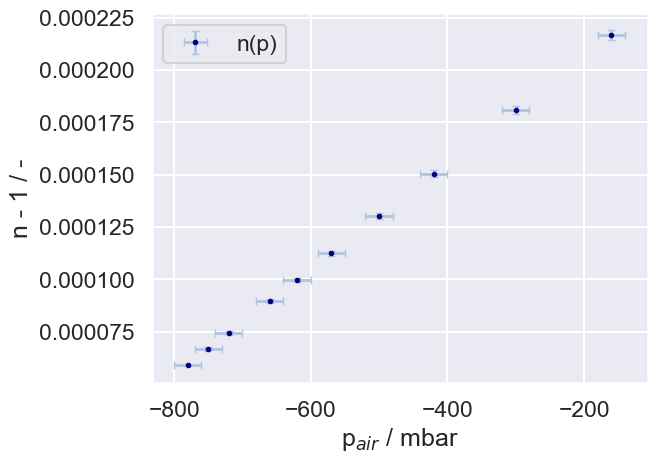

In [21]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("p$_{air}$ / mbar")
plt.ylabel("n - 1 / -")
plt.errorbar(x=x, xerr=xerr, y=y-1 , yerr=yerr, markersize=6, 
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="n(p)")
plt.legend()
#plt.savefig("n_vs_p_.png", dpi=500, bbox_inches="tight")

### I think this is actually what we needed to do:

$n(p) = 1 + \dfrac{\delta n}{\delta p} \cdot p$

starting from n(0) = 1, we add $\delta p$ from above, which is the p in above equation as we start from the vacuum
we know for these specific values how n is changing

In [22]:
import scipy.optimize
def fit_function(p,x):
    k = p
    return k*x

def fit_function_plot(x,k):
    return k*x

In [23]:
x_data = -x
x_data_er = xerr

In [24]:
x_data

array([160., 300., 420., 500., 570., 620., 660., 720., 750., 780.])

In [25]:
y_data = np.zeros(len(delta_n))
y_data_er = np.zeros(len(delta_n))
for i in range(len(delta_n)):
    y_data[i] = delta_n[i].n
    y_data_er[i] = delta_n[i].s

In [31]:
y_data

array([4.16315789e-05, 7.49368421e-05, 1.08242105e-04, 1.24894737e-04,
       1.41547368e-04, 1.58200000e-04, 1.66526316e-04, 1.83178947e-04,
       1.91505263e-04, 1.99831579e-04])

In [26]:
# use ODR
from scipy import odr

data_odr = odr.RealData(x_data, y_data,
                    sx=x_data_er, sy=y_data_er)
odr = odr.ODR(data_odr, odr.Model(fit_function),beta0=[0.])
out = odr.run()

In [32]:
p_opt = out.beta
p_err = out.sd_beta
red_chi_squared = out.res_var
print("fit parameter and 1-sigma error")
print("———————————–")
for i in range(len(p_opt)):
    print(str(p_opt[i]) + " +- " +str(p_err[i]))
print("———————————–")
print("reduced chi squared = ", red_chi_squared)

fit parameter and 1-sigma error
———————————–
2.5388440354339755e-07 +- 9.224193222385449e-10
———————————–
reduced chi squared =  0.10806740710418129


In [36]:
#create x for plotting with the linear fit
linear_fit_p = np.arange(150,800,0.001)

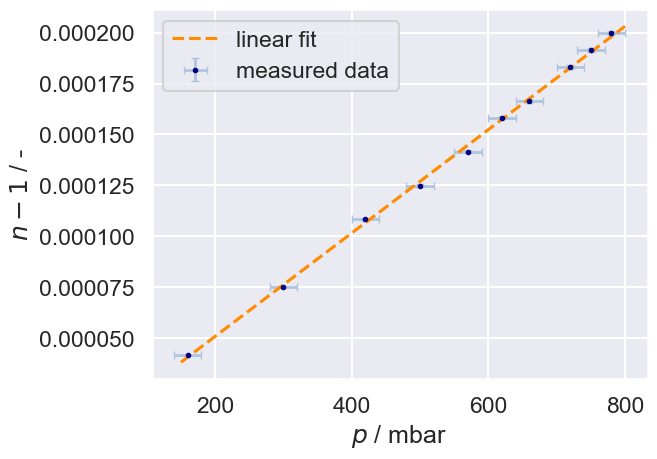

In [53]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("$p$ / mbar")
plt.ylabel("$n - 1$ / -")
plt.errorbar(x=x_data, xerr=x_data_er, y=y_data , yerr=y_data_er,
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="measured data")
plt.plot(linear_fit_p, fit_function_plot(linear_fit_p,p_opt[0]),"--", color="darkorange", label="linear fit")
plt.legend()
#plt.savefig("N_vs_P_talkformat.png", dpi=500, bbox_inches="tight")

In [38]:
slope_from_fit = ufloat(p_opt[0],p_err[0])
slope_from_fit

2.5388440354339755e-07+/-9.224193222385449e-10

In [48]:
n1 = slope_from_fit * ufloat(1015,2)
n1 + 1

1.0002576926695965+/-1.0650839087071463e-06

In [49]:
n2 = slope_from_fit * 1013.25
n2 + 1

1.0002572483718903+/-9.346413782582056e-07

reference wikipedia: 1.000273